In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.7.0


In [3]:
import tensorflow_datasets as tfds

In [4]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

Batch size kendimiz ayarlamak için girmedik.

In [6]:
mnist_training, mnist_test = tfds.load('mnist', split = ['train','test'],batch_size=-1, as_supervised= True)


local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


60000 tane 28 x 28 siyah beyaz . 

In [7]:
print(mnist_training)

(<tf.Tensor: shape=(60000, 28, 28, 1), dtype=uint8, numpy=
array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0

Training labellar ve exampleları ayırıyoruz.


In [8]:
mnist_training_images, mnist_training_labels = mnist_training[0], mnist_training[1]
mnist_test_images, mnist_test_labels = mnist_test[0], mnist_test[1] 

In [9]:
print(mnist_training_images.shape)
print(mnist_training_labels.shape)

(60000, 28, 28, 1)
(60000,)


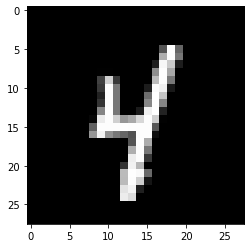

In [10]:
plt.imshow(mnist_training_images[0][:, :, 0], cmap='gray')

In [11]:
num_training_images = mnist_training_images.shape[0]
num_test_images = mnist_test_images.shape[0]

img_width, img_height = mnist_training_images.shape[1], mnist_training_images.shape[2]

Full connectedd network hazırladığımız için . 784 x  1 olan vektöre çevirdik

In [12]:
mnist_training_images = tf.reshape(mnist_training_images, shape=(num_training_images, img_width * img_height))
mnist_test_images = tf.reshape(mnist_test_images, shape=(num_test_images, img_width * img_height))

In [13]:
print(mnist_training_images.shape)
print(mnist_test_images.shape)

(60000, 784)
(10000, 784)


vektor min max

In [14]:
print(np.amax(mnist_training_images[0]),np.amin(mnist_training_images[0]))
print(np.amax(mnist_test_images[0]),np.amin(mnist_test_images[0]))

print(np.amax(mnist_training_labels),np.amin(mnist_training_labels))
print(np.amax(mnist_test_labels),np.amin(mnist_test_labels))

255 0
255 0
9 0
9 0


normalize ediyoruz

In [15]:
def preprocess(x, y):
    x = tf.cast(x, tf.float32) / 255.0
    y = tf.cast(y, tf.int64)

    return x, y

dataseti hazırladık. karıştırdık batch 128 aldık.

In [16]:
def create_dataset(xs, ys, n_classes=10):
    ys = tf.one_hot(ys, depth=n_classes)
    
    return tf.data.Dataset.from_tensor_slices((xs, ys)).map(preprocess).shuffle(len(ys)).batch(128)

In [17]:
train_dataset = create_dataset(mnist_training_images, mnist_training_labels)
test_dataset = create_dataset(mnist_test_images, mnist_test_labels)

In [18]:
print(train_dataset)


<BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.int64)>


batchleri kontrol ettik

In [19]:
batch_images, batch_labels = next(iter(train_dataset))
print(batch_images.shape)
print(batch_labels.shape)

print(batch_images[0])
print(batch_labels[0])


(128, 784)
(128, 10)
tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0

Let's define the hyperparameters of the model that we are going to use. We will create a three layer neural network consisting of dense layers. The layer_neurons variable below defines the sizes of the network.

In [20]:
input_shape = 784
label_shape = 10

lr = 0.003

layer_neurons = [
    [input_shape, 250],
    [250, 80],
    [80, label_shape],
]

bias_shapes = [250, 80, label_shape]
initializer = tf.initializers.glorot_uniform()

dense layer ayrı tanımladık

In [21]:
def dense_layer(inputs, weights, bias):
    return tf.nn.sigmoid(tf.matmul(inputs, weights) + bias)

weight , bias ayarladık

In [22]:
def get_weight(shape, name):
    return tf.Variable(initializer(shape), name=name, trainable=True, dtype=tf.float32)

def get_bias(shape, name):
    return tf.Variable(initializer([shape]), name=name, trainable=True, dtype=tf.float32)

In [23]:
weights = []
bias = []
i = 0
for layer in layer_neurons:
    weights.append(get_weight(layer, 'weight{}'.format(i)))
    i+=1

i = 0
for layer in bias_shapes:
    bias.append(get_bias(layer, 'bias{}'.format(i)))
    i+=1

model tanımladık

In [24]:
def model(input):
    l1 = dense_layer(input, weights[0], bias[0])
    l2 = dense_layer(l1, weights[1], bias[1])
    l3 = dense_layer(l2, weights[2], bias[2])
    return l3
    

optimazer adam seçtik . loss func tanımladık

In [25]:
optimizer = tf.optimizers.Adam(lr)

def loss(pred, target):
    return tf.nn.softmax_cross_entropy_with_logits(target, pred)


We define one training step below. Note that we are using tf.GradientTape here for automatic differentiation. Therefore, we don't have to define the backward pass operations while creating the model.

In [26]:
def train_step(model, inputs, outputs, epoch):
    epoch_loss_avg = None
    
    with tf.GradientTape() as tape:
        current_loss = loss(model(inputs), outputs)
        grads = tape.gradient(current_loss, weights)
        optimizer.apply_gradients(zip(grads, weights))
    
    epoch_loss_avg = tf.reduce_mean(current_loss)
    
    return epoch_loss_avg

Training

In [27]:
num_epochs = 10
for epoch in range(num_epochs):
    epoch_loss = 0
    i = 0
    for train_data in train_dataset:
        batch_images, batch_labels = train_data
        iter_loss = train_step(model, batch_images, batch_labels, epoch)
        epoch_loss += iter_loss
        i+=1
    print("--- On epoch {} ---".format(epoch))
    tf.print("| Loss: ", epoch_loss/i)

--- On epoch 0 ---
| Loss:  1.62248087
--- On epoch 1 ---
| Loss:  1.51222599
--- On epoch 2 ---
| Loss:  1.49516034
--- On epoch 3 ---
| Loss:  1.48616743
--- On epoch 4 ---
| Loss:  1.48058653
--- On epoch 5 ---
| Loss:  1.47658944
--- On epoch 6 ---
| Loss:  1.4738276
--- On epoch 7 ---
| Loss:  1.47174227
--- On epoch 8 ---
| Loss:  1.46987212
--- On epoch 9 ---
| Loss:  1.46852207


Evaluation

In [28]:
acc = 0 
for test_data in test_dataset:
    batch_images, batch_labels = test_data
    predictions = model(batch_images)
    predictions = tf.nn.softmax(predictions)
    equality = tf.math.equal(np.argmax(predictions, axis=1), np.argmax(batch_labels, axis=1))
    acc += np.sum(equality)
acc /= 10000
print(acc)

0.9788
